## pycocotools를 이용한 COCO 데이터 엑세스와 Segmentation Masking 시각화
- pycocotools 사용 부분
  - https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb 참고

In [1]:
from pycocotools.coco import COCO
import numpy as np

### COCO 데이터 세트 Annotation 다운로드

In [2]:
!mkdir -p /content/data
# -p (--parents) : 상위 경로도 함께 생성 

In [3]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip -d /content/data
# trainval annotation 압축 파일 다운로드 후 /content/data 에 압축 해제

--2022-12-16 13:44:52--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.231.153, 52.217.108.60, 52.217.128.9, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.231.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  97.4MB/s    in 2.5s    

2022-12-16 13:44:55 (97.4 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: /content/data/annotations/instances_train2017.json  
  inflating: /content/data/annotations/instances_val2017.json  
  inflating: /content/data/annotations/captions_train2017.json  
  inflating: /content/data/annotations/captions_val2017.json  
  inflating: /content/data/annotations/person_keypoints_train2017.json  
  inflating: /content

### COCO Annotation 정보 확인하기

In [4]:
dataDir = '/content/data'
dataType = 'val2017'
annFile = '{}/annotations/instances_{}.json'.format(dataDir,dataType)
print(annFile)

/content/data/annotations/instances_val2017.json


In [5]:
!ls -lia /content/data/annotations/instances_val2017.json

4589984 -rw-rw-r-- 1 root root 19987840 Sep  1  2017 /content/data/annotations/instances_val2017.json


In [6]:
!sudo apt-get install jq
# 한줄로 되있는 json 파일을 계층적으로 사람이 보기 좋게 바꿀려고 jq 패키지 설치

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libjq1 libonig4
The following NEW packages will be installed:
  jq libjq1 libonig4
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 276 kB of archives.
After this operation, 930 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libonig4 amd64 6.7.0-1 [119 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libjq1 amd64 1.5+dfsg-2 [111 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 jq amd64 1.5+dfsg-2 [45.6 kB]
Fetched 276 kB in 0s (2,388 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /

In [7]:
!jq . /content/data/annotations/instances_val2017.json > output.json


- `jq`: JSON 포맷의 데이터를 다루는 커맨드라인 유틸리티
- `jq` 명령을 이용하면 쉽게 JSON 문서를 다룰 수 있음

In [8]:
!head -100 output.json

{
  "info": {
    "description": "COCO 2017 Dataset",
    "url": "http://cocodataset.org",
    "version": "1.0",
    "year": 2017,
    "contributor": "COCO Consortium",
    "date_created": "2017/09/01"
  },
  "licenses": [
    {
      "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/",
      "id": 1,
      "name": "Attribution-NonCommercial-ShareAlike License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nc/2.0/",
      "id": 2,
      "name": "Attribution-NonCommercial License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nc-nd/2.0/",
      "id": 3,
      "name": "Attribution-NonCommercial-NoDerivs License"
    },
    {
      "url": "http://creativecommons.org/licenses/by/2.0/",
      "id": 4,
      "name": "Attribution License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-sa/2.0/",
      "id": 5,
      "name": "Attribution-ShareAlike License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nd/2.0/

In [9]:
!tail -200 output.json

      "id": 46,
      "name": "wine glass"
    },
    {
      "supercategory": "kitchen",
      "id": 47,
      "name": "cup"
    },
    {
      "supercategory": "kitchen",
      "id": 48,
      "name": "fork"
    },
    {
      "supercategory": "kitchen",
      "id": 49,
      "name": "knife"
    },
    {
      "supercategory": "kitchen",
      "id": 50,
      "name": "spoon"
    },
    {
      "supercategory": "kitchen",
      "id": 51,
      "name": "bowl"
    },
    {
      "supercategory": "food",
      "id": 52,
      "name": "banana"
    },
    {
      "supercategory": "food",
      "id": 53,
      "name": "apple"
    },
    {
      "supercategory": "food",
      "id": 54,
      "name": "sandwich"
    },
    {
      "supercategory": "food",
      "id": 55,
      "name": "orange"
    },
    {
      "supercategory": "food",
      "id": 56,
      "name": "broccoli"
    },
    {
      "supercategory": "food",
      "id": 57,
      "name": "carrot"
    },
    {
      "supercategory":

In [10]:
!grep -n 'annotations' output.json

50054:  "annotations": [


In [11]:
!head -50300 output.json | tail -300 

      "id": 220310
    },
    {
      "license": 3,
      "file_name": "000000512403.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000512403.jpg",
      "height": 640,
      "width": 529,
      "date_captured": "2013-11-24 05:12:53",
      "flickr_url": "http://farm1.staticflickr.com/143/350452845_fa743a9623_z.jpg",
      "id": 512403
    },
    {
      "license": 4,
      "file_name": "000000168974.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000168974.jpg",
      "height": 500,
      "width": 375,
      "date_captured": "2013-11-24 07:19:48",
      "flickr_url": "http://farm3.staticflickr.com/2360/2063838083_64f7514c79_z.jpg",
      "id": 168974
    },
    {
      "license": 1,
      "file_name": "000000552775.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000552775.jpg",
      "height": 500,
      "width": 375,
      "date_captured": "2013-11-24 10:38:31",
      "flickr_url": "http://farm4.staticflickr.com/3136/3106037881_9

### COCO API를 활용하기 위해 annotation 파일을 COCO 객체로 로드하기

In [12]:
from pycocotools.coco import COCO

coco=COCO(annFile)

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!


#### Cagory 정보를 가져 오기

In [13]:
print(coco.getCatIds())
# getCatIds() : COCO Dataset의 category id를 리스트로 반환

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]


In [14]:
cats = coco.loadCats(coco.getCatIds())
cats
# loadCats() : category들에 대한 세부 정보를 여러개의 딕셔너리를 개별 원소를 가지는 리스트로 반환

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [15]:
# COCO Category와 Super Category 출력
nms = [cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
electronic indoor vehicle kitchen outdoor furniture sports accessory food person animal appliance


#### 지정된 이미지를 데이터 세트에서 로드하기

In [16]:
catIds = coco.getCatIds(catNms=['person', 'car', 'chair'])
print(catIds)

imgIds = coco.getImgIds(catIds=catIds)
print(imgIds)
# coco.getImgIds(catIds=catIds) : 해당 catogry id별로 image id를 반환

[1, 3, 62]
[410880, 319369, 160012, 273420, 470924, 40083, 158744, 192670, 67616, 555050, 153011, 39484, 338624, 54593, 350148, 177861, 356424, 74058, 32334, 506707, 231508, 297562, 259690, 342128, 564336]


In [17]:
img = coco.loadImgs(506707)
print(img)

# 전체 리스트는 필요 없고 내부 딕셔너리만 필요하므로 [0]으로 내부 딕셔너리 파일 메타정보 추출
img = coco.loadImgs(506707)[0]
print(img)

[{'license': 1, 'file_name': '000000506707.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000506707.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-23 01:03:32', 'flickr_url': 'http://farm8.staticflickr.com/7024/6437080595_4102ce8326_z.jpg', 'id': 506707}]
{'license': 1, 'file_name': '000000506707.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000506707.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-23 01:03:32', 'flickr_url': 'http://farm8.staticflickr.com/7024/6437080595_4102ce8326_z.jpg', 'id': 506707}


#### COCO 이미지를 다운로드 후 시각화

In [18]:
coco_url = img['coco_url']
print(coco_url)

http://images.cocodataset.org/val2017/000000506707.jpg


In [19]:
import urllib.request

def download_image(url, target_path):
  urllib.request.urlretrieve(url, target_path)

download_image(img['coco_url'], '/content/data/' + img['file_name']) 

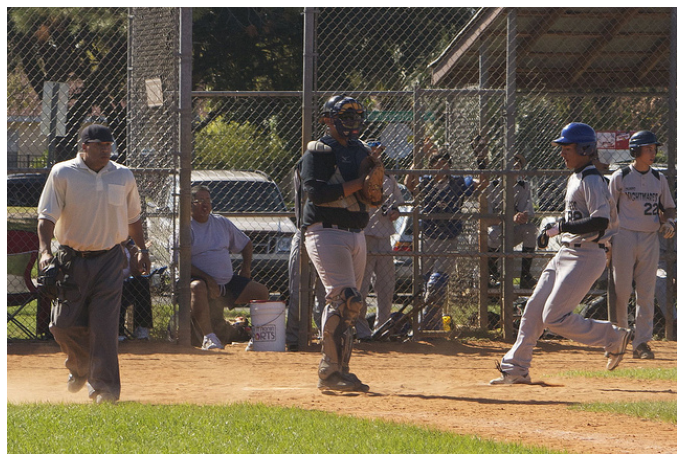

In [20]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

file_path = '/content/data/' + img['file_name']

image_array = cv2.imread(file_path)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 14))
plt.axis('off')
plt.imshow(image_array)
plt.show()

### Instance Segmentation 시각화 - COCO API 활용한 시각화

In [21]:
# 해당 image의 annotation을 가져오기 위해 getAnnIds()를 이용
# 하나의 image는 segmentation별로 여러개의 annotation을 가질 수 있음
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds

[454924,
 508815,
 511934,
 524834,
 544200,
 1224038,
 1354884,
 1355880,
 1718581,
 1751582,
 1945381,
 2038214,
 2222436]

In [22]:
# loadAnns()에 annotation id를 리스트로 입력하면 annotation 정보들을 반환함
anns = coco.loadAnns(annIds)
anns

[{'segmentation': [[618.31,
    121.44,
    622.06,
    129.48,
    622.6,
    139.67,
    620.46,
    145.03,
    617.24,
    152.53,
    614.02,
    152.53,
    626.35,
    158.43,
    630.64,
    165.93,
    634.93,
    173.44,
    640.0,
    191.13,
    639.75,
    217.93,
    634.39,
    221.15,
    628.5,
    219.54,
    624.21,
    216.86,
    623.14,
    218.47,
    621.53,
    247.95,
    618.85,
    288.15,
    618.31,
    311.74,
    615.09,
    317.1,
    612.95,
    320.32,
    616.7,
    328.36,
    620.46,
    333.72,
    616.17,
    337.47,
    601.16,
    335.33,
    596.87,
    334.25,
    599.55,
    317.1,
    601.69,
    295.12,
    599.55,
    276.36,
    599.55,
    265.1,
    593.65,
    280.65,
    591.51,
    308.52,
    578.64,
    301.55,
    574.36,
    298.87,
    574.89,
    251.17,
    573.28,
    235.08,
    574.89,
    223.82,
    579.72,
    220.07,
    586.15,
    213.64,
    586.68,
    201.85,
    584.0,
    190.59,
    579.72,
    182.01,
    575.

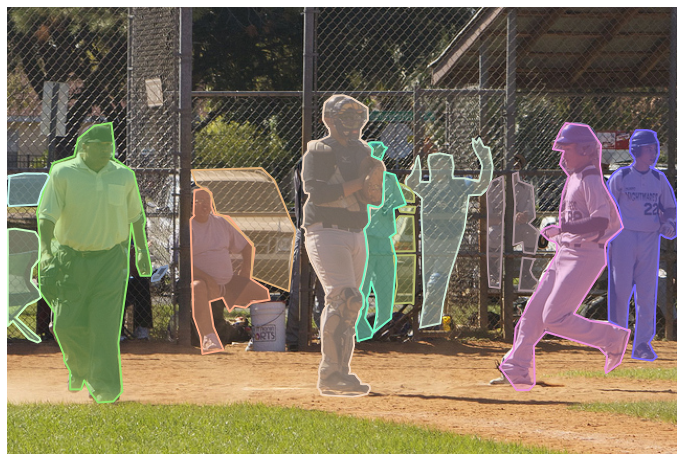

In [23]:
# showAnns( )는 annotation 정보들을 입력 받아서 Visualization 시켜줌
# 단 먼저 matplotlib 객체로 원본 이미지가 먼저 로드되어 있어야 함. 
plt.figure(figsize=(12, 14))
plt.imshow(image_array)
plt.axis('off')

coco.showAnns(anns)